<a href="https://colab.research.google.com/github/BrijPatel15/Vision/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from 

In [4]:

def gaussianKernel(sigma, img):
    size = 2 * math.ceil(3 * sigma) + 1
    x, y = np.mgrid[-size:size + 1, -size:size + 1]
    normal = 1 / (2.0 * np.pi * sigma ** 2)
    gaussian = np.exp(-((x ** 2 + y ** 2) / (2.0 * sigma ** 2))) * normal
    res = ndimage.convolve(img, gaussian)
    return res


def createSobelFilters(img):
    x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    Ix = ndimage.convolve(img, x)
    Iy = ndimage.convolve(img, y)
    res = np.sqrt(Ix ** 2 + Iy ** 2)
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    angle = np.arctan2(Iy, Ix)
    # res = ndimage.sobel(img)
    return G, angle


def nonMaxSuppression(img, theta):
    M, N = img.shape
    Z = np.zeros((M, N), dtype=np.int32)
    angle = theta * 180. / np.pi
    angle[angle < 0] += 180
    for i in range(1, M - 1):
        for j in range(1, N - 1):
            try:
                neighbour1 = 255
                neighbour2 = 255
                # angle 0
                if 0 <= angle[i, j] < 22.5 or 157.5 <= angle[i, j] <= 180:
                    neighbour1 = img[i, j + 1]
                    neighbour2 = img[i, j - 1]
                # angle 45
                elif 22.5 <= angle[i, j] < 67.5:
                    neighbour1 = img[i + 1, j - 1]
                    neighbour2 = img[i - 1, j + 1]
                # angle 90
                elif 67.5 <= angle[i, j] < 112.5:
                    neighbour1 = img[i + 1, j]
                    neighbour2 = img[i - 1, j]
                # angle 135
                elif 112.5 <= angle[i, j] < 157.5:
                    neighbour1 = img[i - 1, j - 1]
                    neighbour2 = img[i + 1, j + 1]

                if img[i, j] >= neighbour1 and img[i, j] >= neighbour2:
                    Z[i, j] = img[i, j]
                else:
                    Z[i, j] = 0
            except:
                pass
    return Z


def myEdgeDetector(img0, sigma):
    img = cv2.imread(img0)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgSmoothed = gaussianKernel(sigma, gray)
    cv2_imshow(imgSmoothed)
    sobelMat = createSobelFilters(imgSmoothed)
    cv2_imshow(sobelMat)
    nonMaxImg = nonMaxSuppression(sobelMat, theta)
    cv2_imshow(nonMaxImg)
    return nonMaxImg



myEdgeDetector("img0.jpg", 2)


NameError: ignored

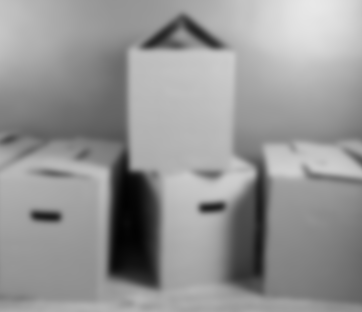

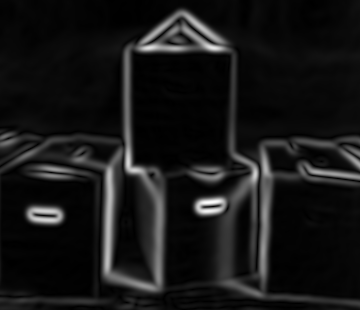

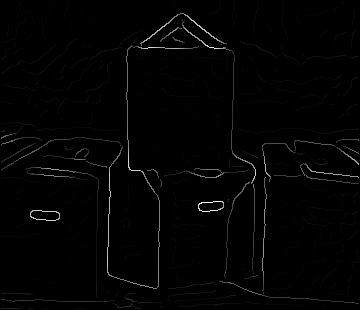

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 34, 35, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)

In [8]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt


def gaussianKernel(sigma, img):
    size = 2 * math.ceil(3 * sigma) + 1
    x, y = np.mgrid[-size:size + 1, -size:size + 1]
    normal = 1 / (2.0 * np.pi * sigma ** 2)
    gaussian = np.exp(-((x ** 2 + y ** 2) / (2.0 * sigma ** 2))) * normal
    # res = np.convolve(img, gaussian)
    res = conv2d(img, gaussian)
    return res

def conv2d(a,f):
    s = f.shape + tuple(np.subtract(a.shape, f.shape) + 1)
    strd = np.lib.stride_tricks.as_strided
    subM = strd(a, shape = s, strides = a.strides * 2)
    return np.einsum('ij,ijkl->kl', f, subM)

def createSobelFilters(img):
    x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    Ix = conv2d(img, x)
    Iy = conv2d(img, y)
    # res = np.sqrt(Ix ** 2 + Iy ** 2)
    res = np.hypot(Ix, Iy)
    res = res / res.max() * 255
    angle = np.arctan2(Iy, Ix)
    return res, angle


def nonMaxSuppression(img, theta):
    M, N = img.shape
    Z = np.zeros((M, N), dtype=np.int32)
    angle = theta * 180. / np.pi
    angle[angle < 0] += 180
    for i in range(1, M - 1):
        for j in range(1, N - 1):
            try:
                neighbour1 = 255
                neighbour2 = 255
                # angle 0
                if 0 <= angle[i, j] < 22.5 or 157.5 <= angle[i, j] <= 180:
                    neighbour1 = img[i, j + 1]
                    neighbour2 = img[i, j - 1]
                # angle 45
                elif 22.5 <= angle[i, j] < 67.5:
                    neighbour1 = img[i + 1, j - 1]
                    neighbour2 = img[i - 1, j + 1]
                # angle 90
                elif 67.5 <= angle[i, j] < 112.5:
                    neighbour1 = img[i + 1, j]
                    neighbour2 = img[i - 1, j]
                # angle 135
                elif 112.5 <= angle[i, j] < 157.5:
                    neighbour1 = img[i - 1, j - 1]
                    neighbour2 = img[i + 1, j + 1]

                if img[i, j] >= neighbour1 and img[i, j] >= neighbour2:
                    Z[i, j] = img[i, j]
                else:
                    Z[i, j] = 0
            except:
                pass
    return Z


def myEdgeDetector(img0, sigma):
    img = cv2.imread(img0)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgSmoothed = gaussianKernel(sigma, gray)
    cv2_imshow(imgSmoothed)
    sobelMat, theta = createSobelFilters(imgSmoothed)
    cv2_imshow(sobelMat)
    nonMaxImg = nonMaxSuppression(sobelMat, theta)
    cv2_imshow(nonMaxImg)
    return nonMaxImg


myEdgeDetector("img0.jpg", 3)
